In [332]:
using CSV
using DataFrames
using Plots
using Missings
using Query
using Statistics
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1317
┌ Warning: Module Plots with build ID 29911392701201 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1008
┌ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
└ @ Base loading.jl:1025


In [49]:
dflabor = CSV.read("DFW7ACTUALPLAN.csv", DataFrame);

In [50]:
cols = names(dflabor)

55-element Vector{String}:
 "Department"
 "Project"
 "Description"
 "Network"
 "Task"
 "Employee No"
 "Employee Name"
 "MAY/2021 Actual"
 "MAY/2021 Planned"
 "MAY/2021 Difference"
 "MAY/2021 Forecast"
 "APR/2021 Actual"
 "APR/2021 Planned"
 ⋮
 "AUG/2020 Actual"
 "AUG/2020 Planned"
 "AUG/2020 Difference"
 "AUG/2020 Forecast"
 "JUL/2020 Actual"
 "JUL/2020 Planned"
 "JUL/2020 Difference"
 "JUL/2020 Forecast"
 "JUN/2020 Actual"
 "JUN/2020 Planned"
 "JUN/2020 Difference"
 "JUN/2020 Forecast"

In [51]:
first(dflabor, 150)

,Department,Project,Description,Network
,String?,String?,String?,String?
1,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
2,missing,152104,missing,missing
3,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
4,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
5,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
6,missing,152104,missing,missing
7,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
8,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
9,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02


In [52]:
dflabor = dropmissing(dflabor, :"Employee Name");

In [53]:
first(dflabor, 150)

,Department,Project,Description,Network
,String?,String?,String?,String?
1,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
2,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
3,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
4,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
5,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
6,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
7,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
8,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
9,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02


In [54]:
Resourcenames=dflabor."Employee Name"

29-element Vector{String}:
 "JUNQUEIRA FILHO GILBERTO"
 "SHETTY RACHIT"
 "REINHARDT ETHAN"
 "HIGA ANTHONY"
 "SHETTY RACHIT"
 "REINHARDT ETHAN"
 "LOOMAN PAULA"
 "JUNQUEIRA FILHO GILBERTO"
 "BORDEN BRADLEY"
 "HIGA ANTHONY"
 "OLADEJI JOSHUA"
 "BARRON MARY"
 "HIGA ANTHONY"
 ⋮
 "BORDEN BRADLEY"
 "HIGA ANTHONY"
 "HIGA ANTHONY"
 "HIGA ANTHONY"
 "SADARE BABATUNDE"
 "HIGA ANTHONY"
 "SADEGHI HAMED"
 "PATRICK ALBERT"
 "KRISHNAKUMAR RISHIKUMAR"
 "MCNIEL ROBERT"
 "HIGA ANTHONY"
 "HIGA ANTHONY"

In [55]:
dfg = groupby(dflabor, :"Employee Name")

,Department,Project,Description,Network
,String?,String?,String?,String?
1,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
2,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02
,Department,Project,Description,Network
,String?,String?,String?,String?
1,430300 ENG - Controls,152104,Amazon DFW7 smalls Polybag Retrofit,N152104-02


In [56]:
dfg_hours_per_month_per_name = combine(dfg, [cols[8] => sum, cols[12]=>sum], cols[16]=>sum, cols[20]=>sum, cols[24] =>sum)

,Employee Name,MAY/2021 Actual_sum,APR/2021 Actual_sum,MAR/2021 Actual_sum
,String,Int64,Int64,Int64
1,JUNQUEIRA FILHO GILBERTO,0,0,0
2,SHETTY RACHIT,0,0,0
3,REINHARDT ETHAN,0,0,0
4,HIGA ANTHONY,197,155,83
5,LOOMAN PAULA,0,0,0
6,BORDEN BRADLEY,0,0,4
7,OLADEJI JOSHUA,0,0,0
8,BARRON MARY,0,0,1
9,STEVENSON DANIEL,0,0,0


In [57]:
show(dfg_hours_per_month_per_name, allcols=true)

14×6 DataFrame
 Row │ Employee Name             MAY/2021 Actual_sum  APR/2021 Actual_sum  MAR/2021 Actual_sum  FEB/2021 Actual_sum  JAN/2021 Actual_sum 
     │ String                    Int64                Int64                Int64                Int64                Int64               
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ JUNQUEIRA FILHO GILBERTO                    0                    0                    0                    0                    0
   2 │ SHETTY RACHIT                               0                    0                    0                    0                    0
   3 │ REINHARDT ETHAN                             0                    0                    0                    0                    1
   4 │ HIGA ANTHONY                              197                  155                   83                   14                   61
   5 │ LOOMAN PAULA    

In [58]:
combine(dfg_hours_per_month_per_name, :"MAY/2021 Actual_sum" =>sum)

,MAY/2021 Actual_sum_sum
,Int64
1,466


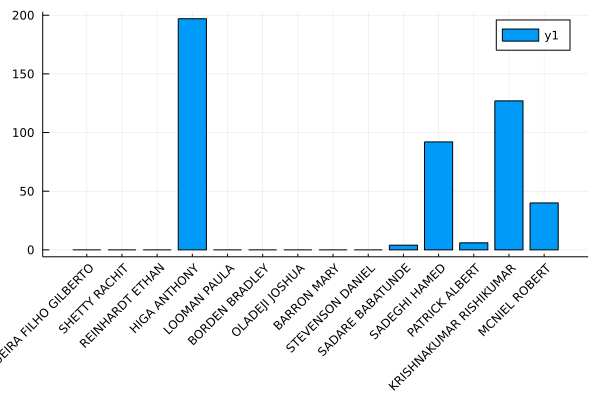

In [173]:
gr()
bar(dfg_hours_per_month_per_name."Employee Name", dfg_hours_per_month_per_name."MAY/2021 Actual_sum", xrotation=45)

getEmployeeActualHoursPast (generic function with 2 methods)

In [168]:
show(getEmployeeActualHoursPast(dflabor, 6), allcols=true)

10×7 DataFrame
 Row │ Employee Name             DEC/2020 Actual_sum  JAN/2021 Actual_sum  FEB/2021 Actual_sum  MAR/2021 Actual_sum  APR/2021 Actual_sum  MAY/2021 Actual_sum 
     │ String                    Int64                Int64                Int64                Int64                Int64                Int64               
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ JUNQUEIRA FILHO GILBERTO                    2                    0                    0                    0                    0                    0
   2 │ REINHARDT ETHAN                             0                    1                    0                    0                    0                    0
   3 │ HIGA ANTHONY                              134                   61                   14                   83                  155                  197
   4 │ BORDEN BRADLEY             

getTotalMonthlyHours (generic function with 2 methods)

In [345]:
dft = getEmployeeActualHoursPast(dflabor, 6)
    

,Employee Name,DEC/2020 Actual_sum,JAN/2021 Actual_sum,FEB/2021 Actual_sum
,String,Int64,Int64,Int64
1,JUNQUEIRA FILHO GILBERTO,2,0,0
2,REINHARDT ETHAN,0,1,0
3,HIGA ANTHONY,134,61,14
4,BORDEN BRADLEY,3,4,4
5,BARRON MARY,0,0,2
6,SADARE BABATUNDE,0,0,0
7,SADEGHI HAMED,0,0,0
8,PATRICK ALBERT,0,0,0
9,KRISHNAKUMAR RISHIKUMAR,0,0,0


In [506]:
monthly = getTotalMonthlyHours(dft,6)

6×2 Matrix{Any}:
 "DEC/2020 Actual_sum_sum"  139
 "JAN/2021 Actual_sum_sum"   66
 "FEB/2021 Actual_sum_sum"   20
 "MAR/2021 Actual_sum_sum"   88
 "APR/2021 Actual_sum_sum"  179
 "MAY/2021 Actual_sum_sum"  466

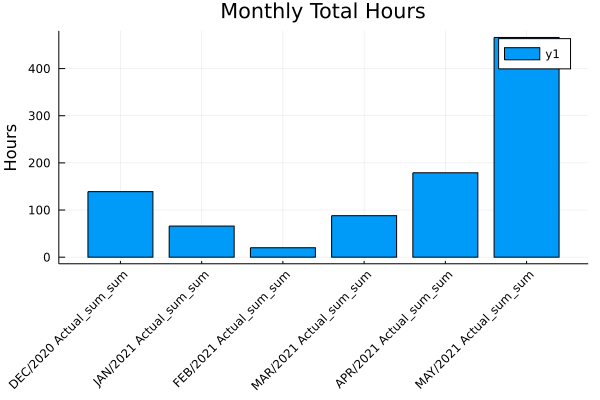

In [354]:
gr()

@df monthly bar(names(monthly), collect(monthly[1,:]), xrotation=45, title="Monthly Total Hours", ylabel="Hours")

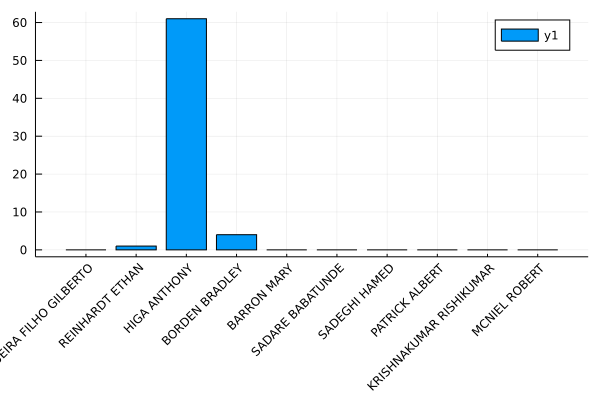

In [344]:
bar(dft[:,1], dft[:,3], xrotation=45)

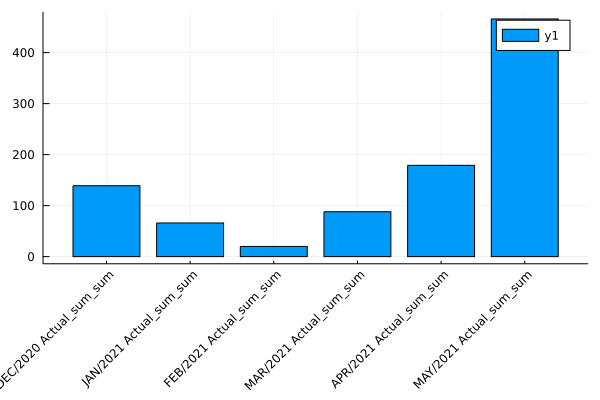

In [509]:
bar(monthly[:,1],monthly[:,2], xrotation=45)

,Employee Name,DEC/2020 Actual_sum,JAN/2021 Actual_sum,FEB/2021 Actual_sum
,String,Int64,Int64,Int64
1,JUNQUEIRA FILHO GILBERTO,2,0,0
2,REINHARDT ETHAN,0,1,0
3,HIGA ANTHONY,134,61,14
4,BORDEN BRADLEY,3,4,4
5,BARRON MARY,0,0,2
6,SADARE BABATUNDE,0,0,0
7,SADEGHI HAMED,0,0,0
8,PATRICK ALBERT,0,0,0
9,KRISHNAKUMAR RISHIKUMAR,0,0,0


In [63]:

q2 = @from i in dft begin
     @where i[2] .> 0
     @select {names=i[1]}
end

names
"""JUNQUEIRA FILHO GILBERTO"""
"""HIGA ANTHONY"""
"""BORDEN BRADLEY"""


In [236]:
dft

,Employee Name,DEC/2020 Actual_sum,JAN/2021 Actual_sum,FEB/2021 Actual_sum
,String,Int64,Int64,Int64
1,JUNQUEIRA FILHO GILBERTO,2,0,0
2,REINHARDT ETHAN,0,1,0
3,HIGA ANTHONY,134,61,14
4,BORDEN BRADLEY,3,4,4
5,BARRON MARY,0,0,2
6,SADARE BABATUNDE,0,0,0
7,SADEGHI HAMED,0,0,0
8,PATRICK ALBERT,0,0,0
9,KRISHNAKUMAR RISHIKUMAR,0,0,0


In [510]:
function getEmployeeActualHoursPast(df, months=6 )
    
    ar = sort([8+4*cols for cols in 0: months-1], rev = true)
    
        
    dfg = groupby(df, :"Employee Name")
    dfg_hours_per_month_per_name = combine(dfg, ar .=>sum)
    
    filter = (sum.(eachrow(dfg_hours_per_month_per_name[!,2:months+1]))).>0
        
    return dfg_hours_per_month_per_name[filter,:]
    
end
    

getEmployeeActualHoursPast (generic function with 2 methods)

In [511]:
function getTotalMonthlyHours(df, months=6)
    dfg = combine(df, 2:months+1 .=>sum)
    nrcols = size(dfg)[2]
    namecols = convert(Array, collect(names(dfg)))
    namecols = reshape(namecols,nrcols,1)
    dat =Matrix(dfg)'
    
    return [namecols dat]
end

getTotalMonthlyHours (generic function with 2 methods)

In [512]:
function cumSumMonthly(df, months=6)
    dfg = combine(df, 2:months+1 .=>sum)
    nrcols = size(dfg)[2]
    namecols = convert(Array, collect(names(dfg)))
    namecols = reshape(namecols,nrcols,1)
    dat =Matrix(dfg)'
    dat = cumsum(dat, dims=1)
    
    return [namecols dat]
end
    
    
    

cumSumMonthly (generic function with 2 methods)